In [2]:
%pip install pandas 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 17.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 18.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os

PUZZLE_PATH = os.getenv('PUZZLE_PATH')

df = pd.read_csv(PUZZLE_PATH)
df.head()

,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags
0,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1925,75,95,7373,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48,NaN
1,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8,1547,73,96,30105,advantage endgame short,https://lichess.org/F8M8OS71#53,NaN
2,0008Q,8/4R3/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 w - - 1 64,e7f7 f5e5 e2f1 e5e6,1266,75,90,678,advantage endgame rookEndgame short,https://lichess.org/MQSyb3KW#127,NaN
3,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...,b6c5 e2g4 h3g4 d1g4,1093,74,87,582,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#32,Kings_Pawn_Game Kings_Pawn_Game_Leonardis_Vari...
4,000VW,r4r2/1p3pkp/p5p1/3R1N1Q/3P4/8/P1q2P2/3R2K1 b -...,g6f5 d5c5 c2e4 h5g5 g7h8 g5f6,2793,100,91,225,crushing endgame long,https://lichess.org/e9AY2m5j/black#50,NaN


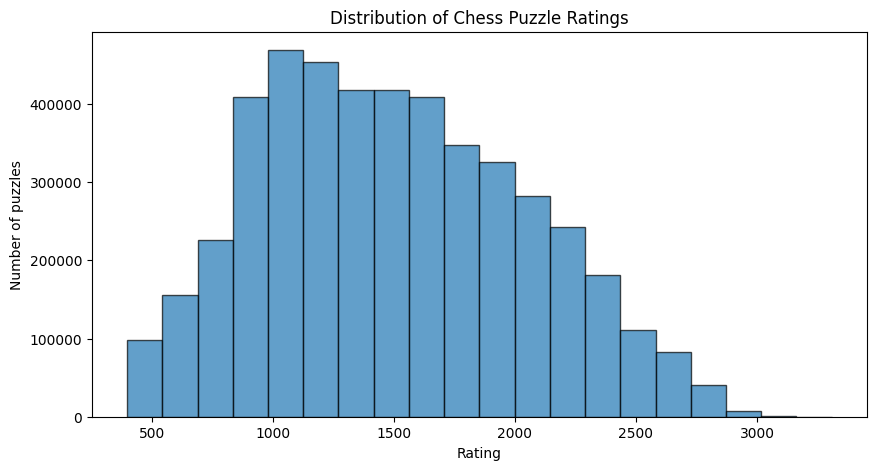

In [16]:
# Check rating distribution
plt.figure(figsize=(10,5))
plt.hist(df['Rating'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel("Rating")
plt.ylabel("Number of puzzles")
plt.title("Distribution of Chess Puzzle Ratings")
plt.show()

In [3]:
min_rating = df['Rating'].min()
max_rating = df['Rating'].max()
print(f"Min rating: {min_rating}")
print(f"Max rating: {max_rating}")

Min rating: 399
Max rating: 3308


In [ ]:
# For example, 10 quantile-based bins
rating_bin = pd.qcut(df['Rating'], q=20, duplicates='drop')

# Check bin counts
print(rating_bin.value_counts())

In [8]:
# Count the number of unique groups
group_counts = df['rating_group'].value_counts()
group_counts

rating_group
1099-1198    330897
999-1098     323806
899-998      315604
1499-1598    294806
1299-1398    287955
1399-1498    282549
1599-1698    279048
1199-1298    276335
1699-1798    246729
799-898      245556
1899-1998    226517
1799-1898    224665
1999-2098    197559
2099-2198    174562
2199-2298    166614
699-798      131188
2299-2398    130233
599-698      115933
2399-2498     90929
499-598       83715
399-498       67841
2499-2598     65474
2599-2698     57199
2699-2798     47586
2799-2898      9622
2899-2998      4857
2999-3098      1257
3099-3198       220
3199-3298        16
3299-3398         1
Name: count, dtype: int64

In [ ]:
# Count the number of ratings in each group
rating_counts = df['rating_group'].value_counts().sort_index()
rating_counts

,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags,rating_group
0,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1925,75,95,7373,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48,NaN,1899-1998
1,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8,1547,73,96,30105,advantage endgame short,https://lichess.org/F8M8OS71#53,NaN,1499-1598
2,0008Q,8/4R3/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 w - - 1 64,e7f7 f5e5 e2f1 e5e6,1266,75,90,678,advantage endgame rookEndgame short,https://lichess.org/MQSyb3KW#127,NaN,1199-1298
3,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...,b6c5 e2g4 h3g4 d1g4,1093,74,87,582,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#32,Kings_Pawn_Game Kings_Pawn_Game_Leonardis_Vari...,999-1098
4,000VW,r4r2/1p3pkp/p5p1/3R1N1Q/3P4/8/P1q2P2/3R2K1 b -...,g6f5 d5c5 c2e4 h5g5 g7h8 g5f6,2793,100,91,225,crushing endgame long,https://lichess.org/e9AY2m5j/black#50,NaN,2699-2798
